In [1]:
from aart_func import * 
from params import * 


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca



In [2]:
# first, specify black hole spin and inclination in params.py
#print black hole spin and inclination angle to check
print(spin_case)
print(i_case)

0.02
45


In [ ]:
# run lengsingbands.py
%time !python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands


In [3]:
# now we read in the results of lensingbands.py
fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

# note that, for our purpose (to produce Q and U loops), only the array supergrid0 is relevant. We do no need to use any other arrays. 
# Thus, let's see what supergrid0 looks like.


Reading file:  ./Results/LensingBands_a_0.02_i_45.h5


In [ ]:
# run raytracing.py
%time !python3 raytracing.py

In [4]:
# and now we read in the results of raytracing.py

fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]


h5f.close()

print(np.nanmax(phi0))
print(np.nanmin(phi0))

Reading file:  ./Results/Rays_a_0.02_i_45.h5
1.5723800824060836
-4.763444928024439


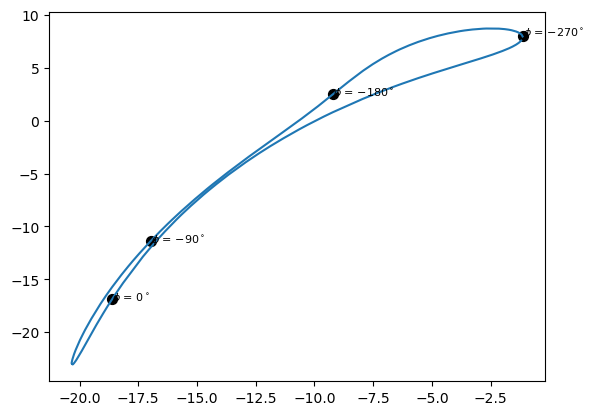

In [12]:
# first, we extract the alpha and beta coordinates from the parameter "grid". Recall that "grid" is calculated by lensingbands.py.
alpha = supergrid0[:,0][mask0]
beta = supergrid0[:, 1][mask0]

# find the corresponding emmission radius, sign, and phi angle
rs = rs0[mask0]
sign = sign0[mask0]
phi = phi0[mask0]

# define the local magnetic field
bvec = [0, 0, 8]

# define the constant emission radius
r_emission = 10

# define the tolerance
tolerance = 0.001

# let's just jump straight to quloop()!
Q, U = qu.quloop(alpha, beta, rs, phi, sign, bvec, r_emission, tolerance)

plt.plot(Q, U)

# that's it! For more details on how exactly qu.quloop() works, check out the quloop_f.py file in aart_func. 